            duration  zero_crossing_rate            rms
count  105835.000000       105835.000000  105835.000000
mean        0.984651            0.115944       0.042574
std         0.508239            0.064844       0.034754
min         0.213333            0.000000       0.002392
25%         1.000000            0.067860       0.019470
50%         1.000000            0.104969       0.034860
75%         1.000000            0.152116       0.055024
max        95.183129            0.557273       0.736598


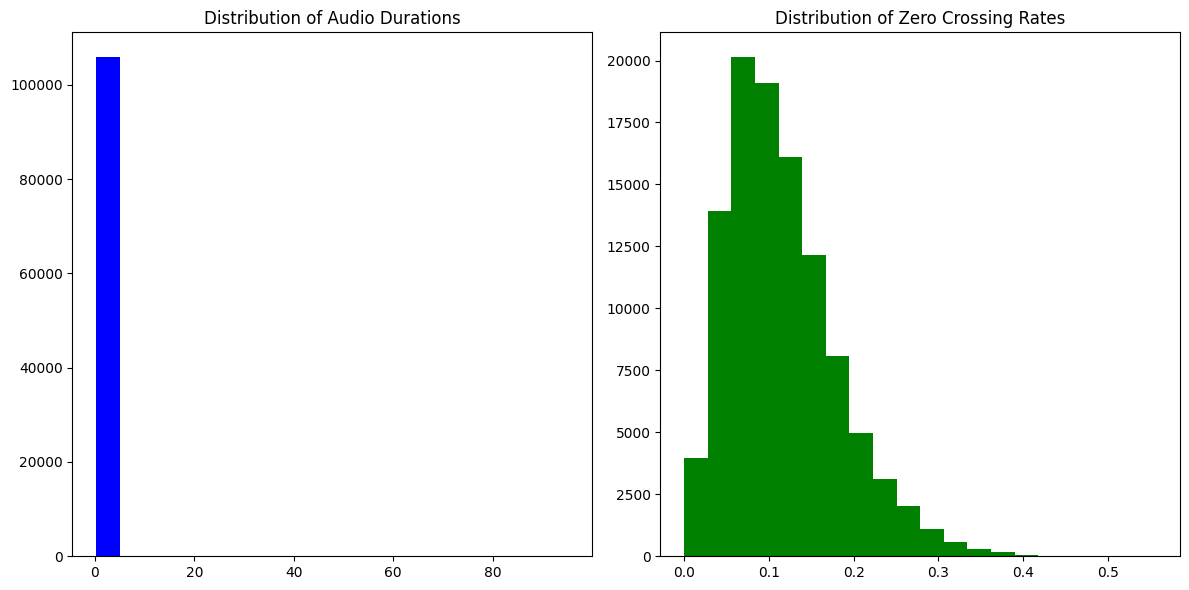

In [4]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to your dataset directory
dataset_dir = '/Users/namanbatheja/Downloads/speech_commands_v0.02'

# Function to extract basic audio features such as duration and zero-crossing rate
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    
    # Extract features
    duration = librosa.get_duration(y=y, sr=sr)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
    rms = np.mean(librosa.feature.rms(y=y))
    
    return duration, zcr, rms

# Lists to hold file information and features
file_paths = []
labels = []
durations = []
zero_crossings = []
rms_values = []

# Iterating through the dataset
for label in os.listdir(dataset_dir):
    word_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(word_dir):
        for audio_file in os.listdir(word_dir):
            if audio_file.endswith('.wav'):
                file_path = os.path.join(word_dir, audio_file)
                # Extract features for each audio file
                duration, zcr, rms = extract_features(file_path)
                # Append features and labels
                file_paths.append(file_path)
                labels.append(label)
                durations.append(duration)
                zero_crossings.append(zcr)
                rms_values.append(rms)

# Create a DataFrame to store the data
df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels,
    'duration': durations,
    'zero_crossing_rate': zero_crossings,
    'rms': rms_values       
})

# Display basic statistics
print(df.describe())

# Plot distributions for a quick analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=20, color='blue')
plt.title('Distribution of Audio Durations')

plt.subplot(1, 2, 2)
plt.hist(df['zero_crossing_rate'], bins=20, color='green')
plt.title('Distribution of Zero Crossing Rates')

plt.tight_layout()
plt.show()


In [ ]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav
import os
from datetime import datetime

# Set parameters for the recording
SAMPLE_RATE = 16000  # 16 kHz sample rate (same as the dataset)
DURATION = 1  # 1 second recording duration

# List of commands (same as in the original dataset)
commands = ['follow', 'happy', 'on', 'learn', 'visual', 'up', 'stop', 'forward', 'four', 'cat','right', 'off', 'five', 'six', 'down', 'backward','house','two','three','dog','marvin','seven','wow','go','word','bed','tree','left','no','one','yes','nine']
# Directory to save your recordings
user_id = "user_naman"  # Replace this with your user ID
save_path = f"./{user_id}"

# Create directory for user if it doesn't exist
if not os.path.exists(save_path):
    os.mkdir(save_path)

# Function to record audio
def record_audio(filename, duration, sample_rate):
    print(f"Recording {filename} for {duration} seconds...")
    recording = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype=np.int16)
    sd.wait()  # Wait for the recording to finish
    wav.write(filename, sample_rate, recording)  # Save the recording to a file

# Record samples for each command
for command in commands:
    command_path = os.path.join(save_path, command)
    
    # Create a folder for each command if it doesn't exist
    if not os.path.exists(command_path):
        os.mkdir(command_path)
    
    # Record 30 samples per command
    for i in range(30):
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  # To ensure unique filenames
        filename = f"{command_path}/{command}_{i+1}_{timestamp}.wav"
        record_audio(filename, DURATION, SAMPLE_RATE)
        print(f"Saved: {filename}")

    print(f"Completed recording 30 samples for command: {command}")

print("All recordings are done!")


In [4]:
# way of recording 
import sounddevice as sd
import numpy as np
import os
import wave
import time

# Path to your dataset
dataset_path = '/Users/namanbatheja/Downloads/speech_commands_v0.02'
commands = ['one','yes','nine']
fs = 16000  # Sampling rate
duration = 1  # Duration of each recording in seconds
num_samples = 30  # Number of recordings per command

def record_and_save(filename):
    print(f"Recording {filename}...")
    audio_data = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
    sd.wait()  # Wait until recording is finished
    
    # Save the audio file
    with wave.open(filename, 'wb') as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)  # 16-bit audio
        wf.setframerate(fs)
        wf.writeframes(audio_data.tobytes())
    print(f"Saved: {filename}")

for command in commands:
    command_dir = os.path.join(dataset_path, command)
    if not os.path.exists(command_dir):
        os.makedirs(command_dir)
    
    for i in range(1, num_samples + 1):
        filename = os.path.join(command_dir, f"{command}_naman_{i}.wav")
        record_and_save(filename)
        time.sleep(3)  # 3-second pause between recordings


Recording /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_1.wav...
Saved: /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_1.wav
Recording /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_2.wav...
Saved: /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_2.wav
Recording /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_3.wav...
Saved: /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_3.wav
Recording /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_4.wav...
Saved: /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_4.wav
Recording /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_5.wav...
Saved: /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_5.wav
Recording /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_6.wav...
Saved: /Users/namanbatheja/Downloads/speech_commands_v0.02/one/one_naman_6.wav
Recording /Users

In [9]:
# Uncomment the line corresponding to your "runtime type" to run in Google Colab

# CPU:
!pip install pydub torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# GPU:
!pip install pydub torch==1.7.0+cu101 torchvision==0.8.1+cu101 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys
import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
ERROR: Could not find a version that satisfies the requirement torch==1.7.0+cpu (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.7.0+cpu
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
ERROR: Could not find a version that satisfies the requirement torch==1.7.0+cu101 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.7.0+cu101


ModuleNotFoundError: No module named 'torch'

In [7]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

In [ ]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

In [ ]:
labels = sorted(list(set(datapoinat[2] for datapoint in train_set)))
labels

In [ ]:
waveform_first, *_ = train_set[0]
ipd.Audio(waveform_first.numpy(), rate=sample_rate)

waveform_second, *_ = train_set[1]
ipd.Audio(waveform_second.numpy(), rate=sample_rate)

In [ ]:
waveform_last, *_ = train_set[-1]
ipd.Audio(waveform_last.numpy(), rate=sample_rate)

In [ ]:
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(waveform)

ipd.Audio(transformed.numpy(), rate=new_sample_rate)

In [ ]:
def label_to_index(word):
    # Return the position of the word in labels
    return torch.tensor(labels.index(word))


def index_to_label(index):
    # Return the word corresponding to the index in labels
    # This is the inverse of label_to_index
    return labels[index]


word_start = "yes"
index = label_to_index(word_start)
word_recovered = index_to_label(index)

print(word_start, "-->", index, "-->", word_recovered)

In [ ]:
def pad_sequence(batch):
    # Make all tensor in a batch the same length by padding with zeros
    batch = [item.t() for item in batch]
    batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
    return batch.permute(0, 2, 1)


def collate_fn(batch):

    # A data tuple has the form:
    # waveform, sample_rate, label, speaker_id, utterance_number

    tensors, targets = [], []

    # Gather in lists, and encode labels as indices
    for waveform, _, label, *_ in batch:
        tensors += [waveform]
        targets += [label_to_index(label)]

    # Group the list of tensors into a batched tensor
    tensors = pad_sequence(tensors)
    targets = torch.stack(targets)

    return tensors, targets


batch_size = 256

if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

In [ ]:
class M5(nn.Module):
    def __init__(self, n_input=1, n_output=35, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(2 * n_channel, n_output)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=2)


model = M5(n_input=transformed.shape[0], n_output=len(labels))
model.to(device)
print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


n = count_parameters(model)
print("Number of parameters: %s" % n)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

In [ ]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)

        # negative log-likelihood for a tensor of size (batch x 1 x n_output)
        loss = F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        # update progress bar
        pbar.update(pbar_update)
        # record loss
        losses.append(loss.item())

In [ ]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

In [ ]:
log_interval = 20
n_epoch = 2

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

# The transform needs to live on the same device as the model and the data.
transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train(model, epoch, log_interval)
        test(model, epoch)
        scheduler.step()

# Let's plot the training loss versus the number of iteration.
# plt.plot(losses);
# plt.title("training loss");

In [ ]:
def predict(tensor):
    # Use the model to predict the label of the waveform
    tensor = tensor.to(device)
    tensor = transform(tensor)
    tensor = model(tensor.unsqueeze(0))
    tensor = get_likely_index(tensor)
    tensor = index_to_label(tensor.squeeze())
    return tensor


waveform, sample_rate, utterance, *_ = train_set[-1]
ipd.Audio(waveform.numpy(), rate=sample_rate)

print(f"Expected: {utterance}. Predicted: {predict(waveform)}.")

In [ ]:
for i, (waveform, sample_rate, utterance, *_) in enumerate(test_set):
    output = predict(waveform)
    if output != utterance:
        ipd.Audio(waveform.numpy(), rate=sample_rate)
        print(f"Data point #{i}. Expected: {utterance}. Predicted: {output}.")
        break
else:
    print("All examples in this dataset were correctly classified!")
    print("In this case, let's just look at the last data point")
    ipd.Audio(waveform.numpy(), rate=sample_rate)
    print(f"Data point #{i}. Expected: {utterance}. Predicted: {output}.")

In [ ]:
def record(seconds=1):

    from google.colab import output as colab_output
    from base64 import b64decode
    from io import BytesIO
    from pydub import AudioSegment

    RECORD = (
        b"const sleep  = time => new Promise(resolve => setTimeout(resolve, time))\n"
        b"const b2text = blob => new Promise(resolve => {\n"
        b"  const reader = new FileReader()\n"
        b"  reader.onloadend = e => resolve(e.srcElement.result)\n"
        b"  reader.readAsDataURL(blob)\n"
        b"})\n"
        b"var record = time => new Promise(async resolve => {\n"
        b"  stream = await navigator.mediaDevices.getUserMedia({ audio: true })\n"
        b"  recorder = new MediaRecorder(stream)\n"
        b"  chunks = []\n"
        b"  recorder.ondataavailable = e => chunks.push(e.data)\n"
        b"  recorder.start()\n"
        b"  await sleep(time)\n"
        b"  recorder.onstop = async ()=>{\n"
        b"    blob = new Blob(chunks)\n"
        b"    text = await b2text(blob)\n"
        b"    resolve(text)\n"
        b"  }\n"
        b"  recorder.stop()\n"
        b"})"
    )
    RECORD = RECORD.decode("ascii")

    print(f"Recording started for {seconds} seconds.")
    display(ipd.Javascript(RECORD))
    s = colab_output.eval_js("record(%d)" % (seconds * 1000))
    print("Recording ended.")
    b = b64decode(s.split(",")[1])

    fileformat = "wav"
    filename = f"_audio.{fileformat}"
    AudioSegment.from_file(BytesIO(b)).export(filename, format=fileformat)
    return torchaudio.load(filename)


# Detect whether notebook runs in google colab
if "google.colab" in sys.modules:
    waveform, sample_rate = record()
    print(f"Predicted: {predict(waveform)}.")
    ipd.Audio(waveform.numpy(), rate=sample_rate)